In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 13.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [2]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from IPython.display import Image

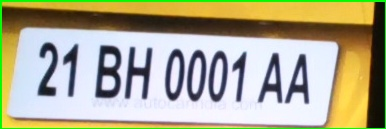

In [3]:
Image("/content/scaned_img_2.jpg")

In [4]:

reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [5]:

output = reader.readtext('/content/scaned_img_2.jpg')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


In [6]:
output

[([[30, 34], [320, 34], [320, 112], [30, 112]],
  '21 BH 0001 AA',
  0.9534045635341053)]

In [7]:
pip install xlwt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 4.0 MB/s eta 0:00:00


In [23]:
import xlwt
import easyocr

# Initialize the reader
reader = easyocr.Reader(['en'])

# Read text from image
output = reader.readtext('/content/scaned_img_2.jpg')

# Create a workbook and add a sheet
workbook = xlwt.Workbook()
sheet = workbook.add_sheet("Number Plate")

# Specifying style
style = xlwt.easyxf('font: bold 1')

# Specifying column headers
sheet.write(0, 0, 'Detected Text', style)

# Write extracted data to the sheet
row = 1  # Start writing data from the second row

for item in output:
    text = item[1]  # Extracting the text part from the output
    sheet.write(row, 0, text)
    row += 1

# Save the workbook
workbook.save("cgv_project.xls")


In [9]:
cord = output[-1][0]

In [10]:
cord

[[30, 34], [320, 34], [320, 112], [30, 112]]

In [11]:
a = list(zip(*cord))
a

[(30, 320, 320, 30), (34, 34, 112, 112)]

In [12]:
min(a[0])

30

In [13]:
min(a[1])

34

In [14]:
max(a[0])

320

In [15]:
max(a[1])

112

In [16]:

x_min, y_min = [int(min(idx)) for idx in zip(*cord)]

In [17]:
x_min, y_min

(30, 34)

In [18]:

x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
x_max, y_max

(320, 112)

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 30

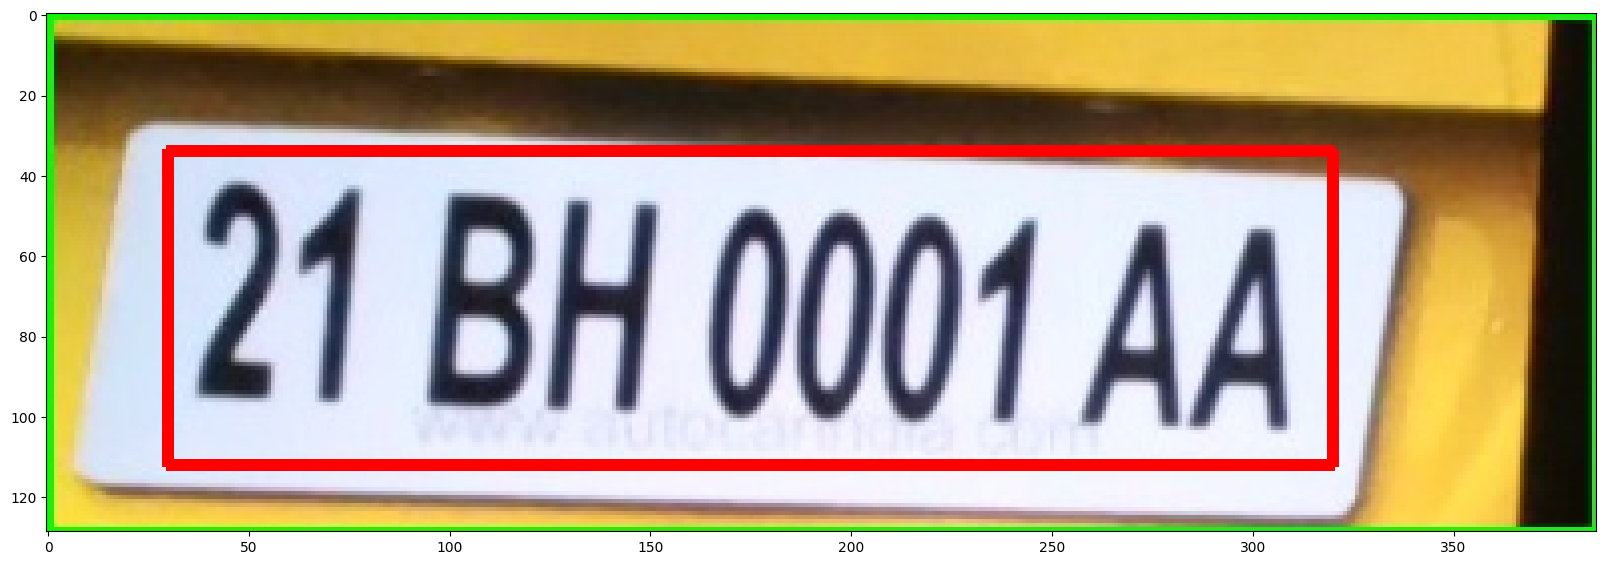

In [22]:
image = cv2.imread('/content/scaned_img_2.jpg')
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))